In [1]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [42]:
import nltk
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger_eng.zip.


True

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re,string

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer , WordNetLemmatizer
from nltk.corpus import wordnet

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')

STOPWORDS = set(stopwords.words('english'))
from wordcloud import WordCloud

#for model-building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.feature_extraction.text import TfidfVectorizer

#for word embedding
import gensim
from gensim.models import Word2Vec #Word2Vec is mostly used for huge datasets


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [30]:
data = pd.read_csv('twitter_training.csv',header=None)
print(data.shape)
data.head()

(74682, 4)


,0,1,2,3
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [31]:
#Rename the columns
data.columns = ['tweet_id','subject','sentiment','text']
data.head()

,tweet_id,subject,sentiment,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [32]:
#check for null values
data.isnull().sum()

tweet_id       0
subject        0
sentiment      0
text         686
dtype: int64

In [33]:
data['text'].isna() == True
data.dropna(inplace=True)
print(f"Dataset shape after dropping null values: {data.shape}")

Dataset shape after dropping null values: (73996, 4)


Class distribution: 
 sentiment
Negative      22358
Positive      20655
Neutral       18108
Irrelevant    12875
Name: count, dtype: int64


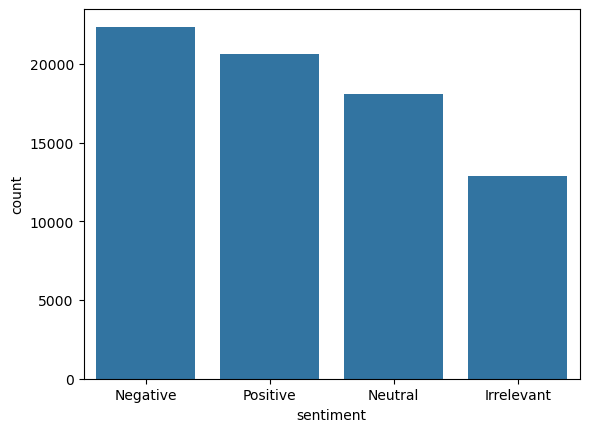

In [34]:
#Data Distribution based on seabon library for statical data vizualization
sentiment_counts = data['sentiment'].value_counts()
sns.barplot(sentiment_counts)
print("Class distribution: \n", sentiment_counts)

In [35]:
#Percentage distribution
print(f"Sentiment value count - percentage distribution : \n{round(data['sentiment'].value_counts()/data.shape[0]*100,2)}")

Sentiment value count - percentage distribution : 
sentiment
Negative      30.22
Positive      27.91
Neutral       24.47
Irrelevant    17.40
Name: count, dtype: float64


In [36]:
data['length'] = data['text'].apply(len)
data.head()

,tweet_id,subject,sentiment,text,length
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,53
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,51
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,50
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,51
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,57


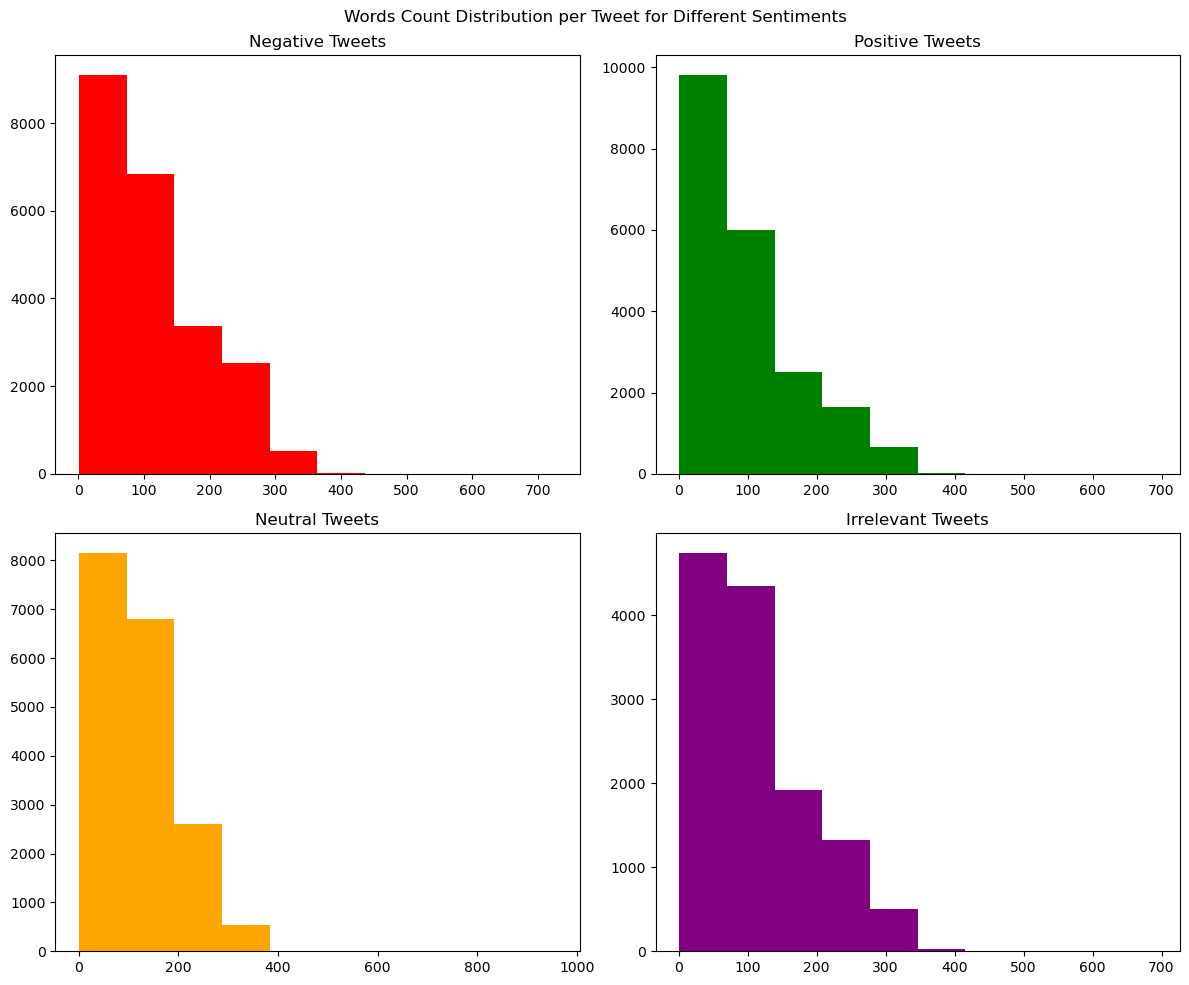

In [37]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))

# Negative sentiment
train_words = data[data['sentiment'] == 'Negative']['length']
ax1.hist(train_words, color='red')
ax1.set_title('Negative Tweets')

# Positive sentiment
train_words = data[data['sentiment'] == 'Positive']['length']
ax2.hist(train_words, color='green')
ax2.set_title('Positive Tweets')

# Neutral sentiment
train_words = data[data['sentiment'] == 'Neutral']['length']
ax3.hist(train_words, color='orange')
ax3.set_title('Neutral Tweets')

# Irrelevant sentiment
train_words = data[data['sentiment'] == 'Irrelevant']['length']
ax4.hist(train_words, color='purple')  # Changed color to distinguish from green used for Positive
ax4.set_title('Irrelevant Tweets')

fig.suptitle('Words Count Distribution per Tweet for Different Sentiments')
plt.tight_layout()
plt.show()


In [38]:
#1. Common text preprocessing
text = "   This is a message to be cleaned. It may involve some things like: , ?, :, ''  adjacent spaces and tabs     .  "

#convert to lowercase and remove punctuations and characters and then strip
def preprocess(text):
    text = text.lower().strip() #lowercase text
    text=re.compile('<.*?>').sub('', text) #Remove HTML tags/markups
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)  #Replace punctuation with space. Careful since punctuation can sometime be useful
    text = re.sub('\s+', ' ', text)  #Remove extra space and tabs
    text = re.sub(r'\[[0-9]*\]',' ',text) #[0-9] matches any digit (0 to 10000...)
    text=re.sub(r'[^\w\s]', '', str(text).lower().strip())
    text = re.sub(r'\d',' ',text) #matches any digit from 0 to 100000..., \D matches non-digits
    text = re.sub(r'\s+',' ',text) #\s matches any whitespace, \s+ matches multiple whitespace, \S matches non-whitespace

    return text

text=preprocess(text)
print(text)  #text is a string

this is a message to be cleaned it may involve some things like adjacent spaces and tabs


In [43]:
#LEXICON Based text processing

#1. STOPWORD removal
def stopword(string):
  return ' '.join([word for word in string.split() if word not in STOPWORDS])

text = stopword(text)
print(text)

#2. Stemming
#Initialize the stemmer
snow = SnowballStemmer('english')
def stemming(string):
  return ' '.join([snow.stem(word) for word in word_tokenize(string)])

text = stemming(text)
print(text)

#3 Lemmatization
#Initialise the Lemmatizer
wl = WordNetLemmatizer()

def get_wordnet_pos(tag):         #Get pos- maps NLTK pos to WordNets pos
  if tag.startswith('J'):
    return wordnet.ADJ
  elif tag.startswith('V'):
    return wordnet.VERB
  elif tag.startswith('N'):
    return wordnet.NOUN
  elif tag.startswith('R'):
    return wordnet.ADV
  else:
    return wordnet.NOUN

#tokenize the sentence
def lemmatizer(string):
  word_pos_tags = nltk.pos_tag(word_tokenize(string))
  a=[wl.lemmatize(tag[0],get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)]
  return " ".join(a)

text = lemmatizer(text)
print(text)

messag clean may involv thing like adjac space tab
messag clean may involv thing like adjac space tab
messag clean may involv thing like adjac space tab


In [45]:
#FINAL PREPROCESSING
def finalpreprocess(string):
  return lemmatizer(stopword(preprocess(string)))

#Applying final preprocessing
data['clean_text'] = data['text'].apply(lambda x: finalpreprocess(x))
data.head()

,tweet_id,subject,sentiment,text,length,clean_text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,53,im get borderland murder
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,51,come border kill
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,50,im get borderland kill
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,51,im come borderland murder
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,57,im get borderland murder


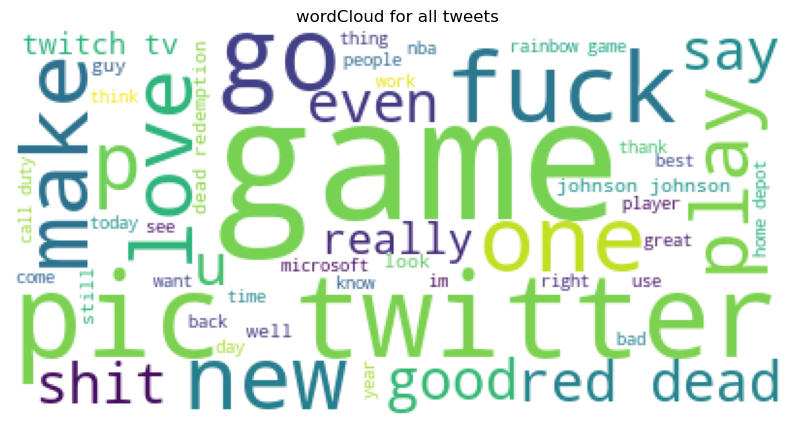

In [46]:
#using wordcloud
#combine all tweets

tweets = " ".join([tweet for tweet in data['clean_text']])
wc = WordCloud(background_color='white',max_words=50)
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(tweets))
plt.title('wordCloud for all tweets')
plt.axis('off')
plt.show()

In [47]:
# Combine all reviews for each feedback category and split them into individual words
neg_rev = set(" ".join([review for review in data[data['sentiment'] == 'Negative']['clean_text']]).lower().split())
pos_rev = set(" ".join([review for review in data[data['sentiment'] == 'Positive']['clean_text']]).lower().split())
neu_rev = set(" ".join([review for review in data[data['sentiment'] == 'Neutral']['clean_text']]).lower().split())
irr_rev = set(" ".join([review for review in data[data['sentiment'] == 'Irrelevant']['clean_text']]).lower().split())

# Find unique words for each category
uni_neg = " ".join(neg_rev - pos_rev - neu_rev - irr_rev)
uni_pos = " ".join(pos_rev - neg_rev - neu_rev - irr_rev)
uni_neu = " ".join(neu_rev - neg_rev - pos_rev - irr_rev)
uni_irr = " ".join(irr_rev - neg_rev - pos_rev - neu_rev)

print("Unique Negative Words:", uni_neg)
print("Unique Positive Words:", uni_pos)
print("Unique Neutral Words:", uni_neu)
print("Unique Irrelevant Words:", uni_irr)


Unique Negative Words: ebo esrlodq caveman thsi radiation wareshift awkpapj febkmipb recieved meity unfairness xboxwire cmegwdf courier resentment puzzled verizonup relegate shawn alienate rito ally bree dafuq maddennfl alnorman rammbi thong atrophy yqfjbza helpppp hashtagguys tmobilehelp draymond brainwashing ybw cookieboy etb foxfoxfoxfo lnrf takealot exceedingly separation doe donaldsenstard ncent furiou wzw maneuver swimming kflsi unjust ubisdsupport wycxgqvq cunts gutfoxx nyccfeig detest fellas interlude forensic не jyq morenine mortar trivia lic humiliating fare phobexuality idgi inter nest polxzc xcllrz trupers boyband sed vvnm entitled starstruck duma wayyyyyyyy mawpiahun involvolved moneeeeeeeyyyyy arcangel dropped tos screwed epex moralize genetic ipads mcgregor reposting tm upperechelon wayyyy mfps marcryanonair likes reubber aventurasnahistoria ache doneatka sakuon nausea irresistible vmobile mcree qoo vwf remov upperhelon rawr gvrfoepdoz beastly boah fanservice comon gougi

In [48]:
# create Word2vec model
data['clean_text_tok']=[nltk.word_tokenize(i) for i in data['clean_text']] 
model = Word2Vec(data['clean_text_tok'],min_count=1)

w2v = dict(zip(model.wv.index_to_key, model.wv.vectors)) 


class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec              
        self.dim = len(next(iter(word2vec.values())))       
# if a text is empty we should return a vector of zeros
# with the same dimensionality as all the other vectors

    def fit(self, X, y):                     
        return self

    def transform(self, X):                  
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec]
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])

In [49]:
#SPLITTING THE TRAINING DATASET INTO TRAINING AND VALIDATION

X_train, X_val, y_train, y_val = train_test_split(data["clean_text"],
                                                  data['sentiment'],
                                                  test_size=0.2,
                                                  shuffle=True)
X_train_tok= [nltk.word_tokenize(i) for i in X_train]  
X_val_tok= [nltk.word_tokenize(i) for i in X_val]      


# Convert x_train to vector 
tfidf_vectorizer = TfidfVectorizer(use_idf=True)
X_train_vectors_tfidf = tfidf_vectorizer.fit_transform(X_train) 
X_val_vectors_tfidf = tfidf_vectorizer.transform(X_val) 

# Fit and transform
modelw = MeanEmbeddingVectorizer(w2v)
X_train_vectors_w2v = modelw.transform(X_train_tok)
X_val_vectors_w2v = modelw.transform(X_val_tok)

In [50]:
# Logistic Regression for training and predicting 
lr_tfidf = LogisticRegression(solver='liblinear', C=10, penalty='l2', multi_class='ovr') 
lr_tfidf.fit(X_train_vectors_tfidf, y_train)
pred_lr_tfidf = lr_tfidf.predict(X_val_vectors_tfidf)

# Accuracy
print('accuracy %s' % accuracy_score(pred_lr_tfidf, y_val))
print(classification_report(y_val, pred_lr_tfidf))

# Compute ROC AUC score for multi-class classification
y_val_prob = lr_tfidf.predict_proba(X_val_vectors_tfidf)
roc_auc = roc_auc_score(y_val, y_val_prob, multi_class='ovr')
print('ROC AUC Score:', roc_auc)

#Confusion Matrix
print('Confusion Matrix: ', confusion_matrix(y_val, pred_lr_tfidf))

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


accuracy 0.845472972972973
              precision    recall  f1-score   support

  Irrelevant       0.88      0.81      0.84      2601
    Negative       0.86      0.87      0.86      4470
     Neutral       0.87      0.82      0.84      3610
    Positive       0.79      0.87      0.83      4119

    accuracy                           0.85     14800
   macro avg       0.85      0.84      0.84     14800
weighted avg       0.85      0.85      0.85     14800

ROC AUC Score: 0.9618310723869978
Confusion Matrix:  [[2099  150   95  257]
 [  76 3889  167  338]
 [  97  230 2944  339]
 [ 106  263  169 3581]]


In [51]:
# Function to preprocess the data
def finalpreprocess(text):
    return text

# Read the data
val_data = pd.read_csv('twitter_validation.csv')
val_data.columns = ['tweet_id', 'subject', 'sentiment', 'text']

# Preprocess the data
val_data['clean_text'] = val_data['text'].apply(lambda x: finalpreprocess(x))
X_test = val_data['clean_text']
X_vector = tfidf_vectorizer.transform(X_test)  # Convert X_test to vector

y_predict = lr_tfidf.predict(X_vector)
y_prob = lr_tfidf.predict_proba(X_vector)[:, 1]

# Add predictions to the DataFrame
val_data['predict_prob'] = y_prob
val_data['sentiment'] = y_predict

print(val_data.head())

# Prepare final submission
final = val_data[['tweet_id', 'sentiment', 'text']].reset_index(drop=True)

output_file = input("Enter the output file name (with .csv extension): ")

# Define the directory where you want to save the file
output_directory = os.path.dirname(output_file)
if not output_directory:
    output_directory = '.'  

if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Write to CSV
try:
    final.to_csv(output_file, index=False)
    print(f"File written successfully to {output_file}")
except PermissionError as e:
    print(f"PermissionError: {e}")
except Exception as e:
    print(f"An error occurred: {e}")

   tweet_id    subject sentiment  \
0       352     Amazon   Neutral   
1      8312  Microsoft  Negative   
2      4371      CS-GO  Negative   
3      4433     Google   Neutral   
4      6273       FIFA  Negative   

                                                text  \
0  BBC News - Amazon boss Jeff Bezos rejects clai...   
1  @Microsoft Why do I pay for WORD when it funct...   
2  CSGO matchmaking is so full of closet hacking,...   
3  Now the President is slapping Americans in the...   
4  Hi @EAHelp I’ve had Madeleine McCann in my cel...   

                                          clean_text  predict_prob  
0  BBC News - Amazon boss Jeff Bezos rejects clai...      0.170687  
1  @Microsoft Why do I pay for WORD when it funct...      0.911984  
2  CSGO matchmaking is so full of closet hacking,...      0.956000  
3  Now the President is slapping Americans in the...      0.005180  
4  Hi @EAHelp I’ve had Madeleine McCann in my cel...      0.950866  


Enter the output file name (with .csv extension):  hi


File written successfully to hi
